In [2]:
import numpy as np
import pandas as pd
import csv
import os
import time
import gc

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize']= 16,5

C:\Python27\lib\site-packages\matplotlib\__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
import Oger
import mdp

Loading Data

In [23]:
data = np.genfromtxt('Resources/data.csv', delimiter=',')

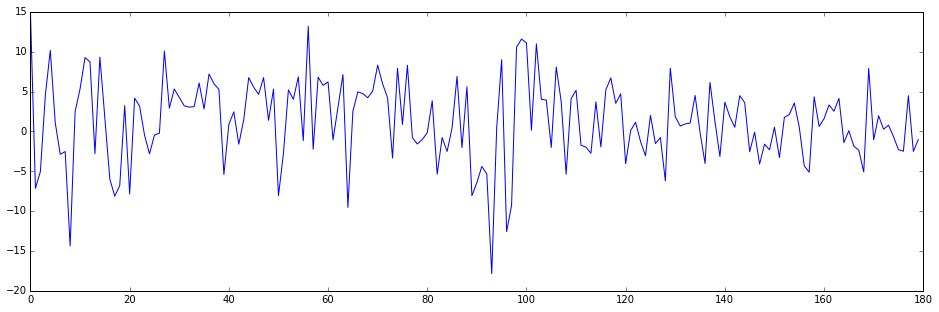

In [24]:
plt.plot(data)

Building the data table [x,y], for an input x there is a y target, where in this case x is te actual value of the time serie and y is the next value in time for the time serie. Here exist two tables, training and validation, where training is values of data from 0 to -6 and validation is from -6 to the end.

In [27]:
[xt,yt] = data[0:-7],data[1:-6]

In [30]:
[xv,yv] = data[-7:-1],data[-6:]

Defining Parameters
resSize reference the size of the reservoir (number of neurons)
initLen references the number of initial observations to ignore in the training process in order to discard transients due to initial conditions
outLen references the number of forecast values
a references the leaking rate

In [32]:
resSize = 100
initLen = 10
outLen = 6
a = 0.6

In [33]:
reservoir = Oger.nodes.LeakyReservoirNode(0.6,input_dim=1,output_dim=1,input_scaling=0)

In [11]:
readout = Oger.nodes.RidgeRegressionNode()

In [13]:
flow = mdp.Flow([reservoir,readout])

In [15]:
data = [x[0:-1], zip(x[0:-1], y[0:-1])]

In [17]:
flow.train(data)

FlowException: 
========================================
While training node #1 (RidgeRegressionNode):
----------------------------------------
! Exception in node #0 (LeakyReservoirNode):
Node Traceback:
Traceback (most recent call last):
  File "C:\Python27\lib\site-packages\mdp\linear_flows.py", line 343, in _execute_seq
    x = flow[i].execute(x)
  File "<string>", line 1, in <lambda>
  File "C:\Python27\lib\site-packages\mdp\signal_node.py", line 643, in execute
    self._pre_execution_checks(x)
  File "C:\Python27\lib\site-packages\mdp\signal_node.py", line 521, in _pre_execution_checks
    self._check_input(x)
  File "C:\Python27\lib\site-packages\mdp\signal_node.py", line 463, in _check_input
    raise NodeException(error_str)
NodeException: x has rank 0, should be 2
----------------------------------------
========================================

In [18]:
[x, y] = Oger.datasets.narma30(sample_len=1000)

In [19]:
[x, y]

[[array([[ 0.37539882],
         [ 0.07693703],
         [ 0.23950251],
         [ 0.29563582],
         [ 0.13307261],
         [ 0.49140349],
         [ 0.1598772 ],
         [ 0.05341686],
         [ 0.03077916],
         [ 0.04313619],
         [ 0.15407093],
         [ 0.09573735],
         [ 0.32604331],
         [ 0.31263027],
         [ 0.18256692],
         [ 0.3407329 ],
         [ 0.3890144 ],
         [ 0.47239255],
         [ 0.41595572],
         [ 0.43151   ],
         [ 0.25160884],
         [ 0.35034254],
         [ 0.42099459],
         [ 0.43957493],
         [ 0.19600052],
         [ 0.21241982],
         [ 0.18402672],
         [ 0.15279068],
         [ 0.36874029],
         [ 0.29448028],
         [ 0.00093214],
         [ 0.48269883],
         [ 0.09490957],
         [ 0.35189009],
         [ 0.02103584],
         [ 0.29401691],
         [ 0.07798728],
         [ 0.46287911],
         [ 0.07074536],
         [ 0.4184118 ],
         [ 0.13667765],
         [ 0.027